In [1]:
import pandas as pd
import numpy as np

# Suponiendo que df es tu DataFrame original
df = pd.read_csv('users.csv', encoding='latin-1')

# Añadir nuevas columnas con valores iniciales (por ejemplo, NaN)
df['IMC'] = np.nan
df['DuracionDiabetes'] = np.nan
df['HorasSueno'] = np.nan
df['NivelEstres'] = np.nan
df['ActividadFisica'] = np.nan
df['TipoAlimentacion'] = np.nan
df['ConsumoCafeina'] = np.nan
df['UsoTecnologia'] = np.nan


In [2]:
# Establecer la semilla para reproducibilidad
np.random.seed(0)

# Ejemplos de cómo generar datos falsos para cada nueva columna
df['IMC'] = np.random.normal(25, 4, len(df))  # IMC con distribución normal
df['DuracionDiabetes'] = np.random.poisson(5, len(df))  # Duración con distribución de Poisson
df['HorasSueno'] = np.random.choice([6, 7, 8, 9], size=len(df), p=[0.15, 0.35, 0.35, 0.15])  # Horas de sueño
df['NivelEstres'] = np.random.choice(['Bajo', 'Medio', 'Alto'], size=len(df), p=[0.3, 0.5, 0.2])  # Nivel de estrés
df['ActividadFisica'] = np.random.choice(['Baja', 'Moderada', 'Alta'], size=len(df), p=[0.4, 0.4, 0.2])  # Actividad física
df['TipoAlimentacion'] = np.random.choice(['BajaCarb', 'Vegetariana', 'Balanceada'], size=len(df), p=[0.3, 0.3, 0.4])  # Tipo de alimentación
df['ConsumoCafeina'] = np.random.normal(2, 1, len(df))  # Consumo de cafeína (tazas al día)
df['UsoTecnologia'] = np.random.normal(5, 2, len(df))  # Horas de uso de tecnología al día

In [3]:
# Limpieza básica y manejo de valores atípicos o no realistas
df['IMC'] = df['IMC'].clip(lower=15, upper=40)  # Asegurar que los valores de IMC sean realistas
df['ConsumoCafeina'] = df['ConsumoCafeina'].clip(lower=0)  # El consumo de cafeína no puede ser negativo
df['UsoTecnologia'] = df['UsoTecnologia'].clip(lower=0, upper=12)  # Limitar las horas de uso de tecnología

In [4]:
df1 = df.head(1500)
df2 = df.head(5000)
df3 = df.head(10000)
df4 = df.head(30000)

C:\Users\Msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


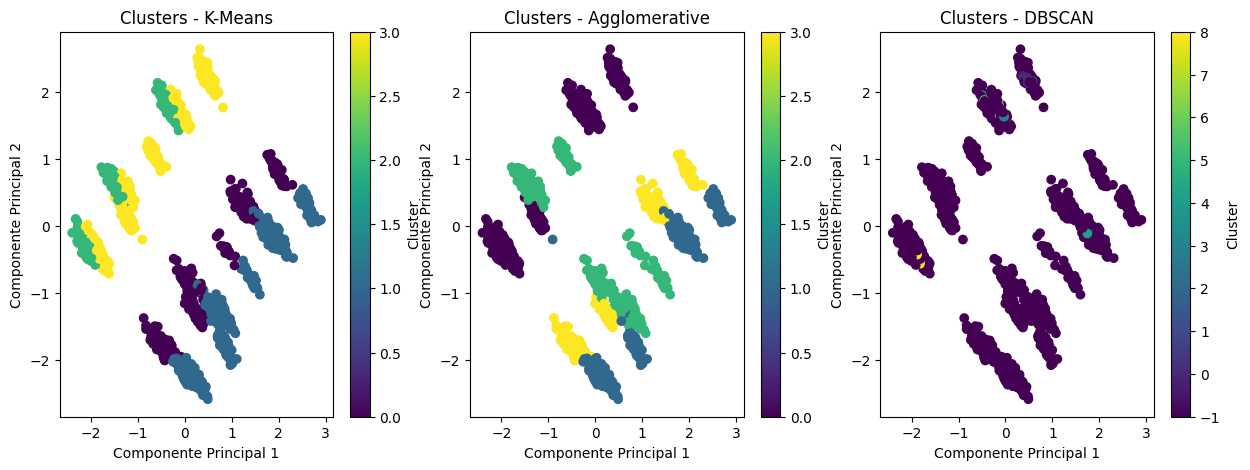

Puntuaciones de Silueta:
K-Means: 0.13866292698304114
Agglomerative: 0.16800594603275623
DBSCAN: -0.28211420219240335


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Suponiendo que tienes un DataFrame 'df' con las nuevas columnas

df = df1

# Selecciona las columnas numéricas que se utilizarán para el clustering
columns_for_clustering = ['IMC', 'DuracionDiabetes', 'HorasSueno', 'NivelEstres', 'ActividadFisica', 'TipoAlimentacion', 'ConsumoCafeina', 'UsoTecnologia']

# Filtra el DataFrame con las columnas seleccionadas
data_for_clustering = df[columns_for_clustering]

# Codifica las variables categóricas usando one-hot encoding
data_for_clustering_encoded = pd.get_dummies(data_for_clustering, columns=['TipoAlimentacion', 'NivelEstres', 'ActividadFisica'])

# Normaliza los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering_encoded)

# Aplica PCA para reducir la dimensionalidad (opcional pero puede ayudar)
pca = PCA(n_components=2)
data_for_clustering_pca = pca.fit_transform(data_for_clustering_scaled)

# Métodos de clustering
cluster_methods = [
    ('K-Means', KMeans(n_clusters=4, random_state=0)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=4)),
    ('DBSCAN', DBSCAN(eps=1.0, min_samples=5))  # Ajusta los parámetros de DBSCAN
]

# Genera clústeres para cada método y calcula la puntuación de silueta
silhouette_scores = {}
cluster_labels = {}

for method_name, method in cluster_methods:
    labels = method.fit_predict(data_for_clustering_scaled)
    silhouette_avg = silhouette_score(data_for_clustering_scaled, labels)
    silhouette_scores[method_name] = silhouette_avg
    cluster_labels[method_name] = labels

# Visualización de clústeres en el espacio PCA (2D) para cada método
plt.figure(figsize=(15, 5))
for i, (method_name, labels) in enumerate(cluster_labels.items(), start=1):
    plt.subplot(1, 3, i)
    plt.scatter(data_for_clustering_pca[:, 0], data_for_clustering_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title(f'Clusters - {method_name}')
    plt.colorbar(label='Cluster')

plt.show()

# Imprime las puntuaciones de silueta para comparar los métodos
print("Puntuaciones de Silueta:")
for method_name, score in silhouette_scores.items():
    print(f"{method_name}: {score}")


C:\Users\Msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


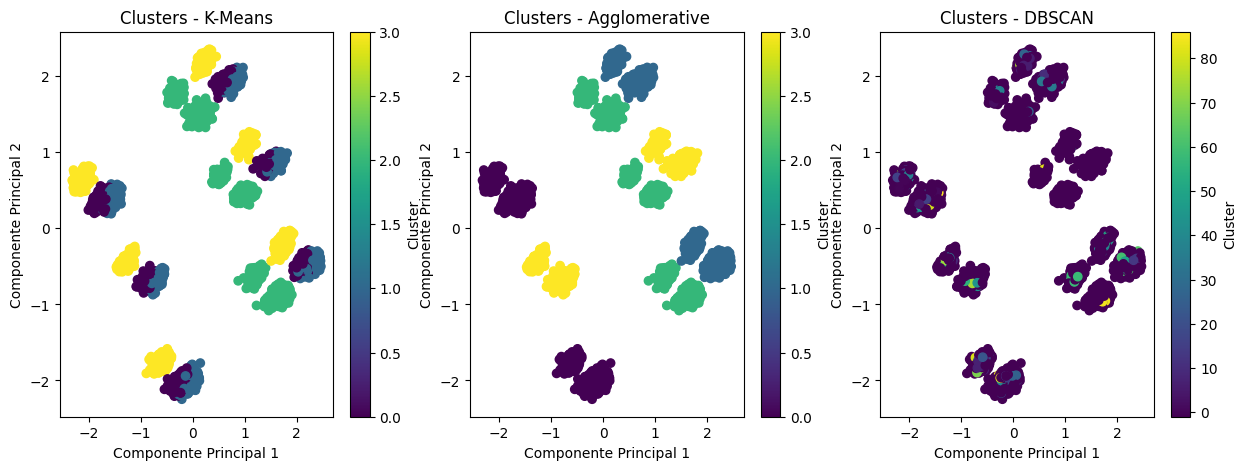

Puntuaciones de Silueta:
K-Means: 0.16645690649793815
Agglomerative: 0.16675662205703198
DBSCAN: -0.33854303058245067


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Suponiendo que tienes un DataFrame 'df' con las nuevas columnas

df = df2

# Selecciona las columnas numéricas que se utilizarán para el clustering
columns_for_clustering = ['IMC', 'DuracionDiabetes', 'HorasSueno', 'NivelEstres', 'ActividadFisica', 'TipoAlimentacion', 'ConsumoCafeina', 'UsoTecnologia']

# Filtra el DataFrame con las columnas seleccionadas
data_for_clustering = df[columns_for_clustering]

# Codifica las variables categóricas usando one-hot encoding
data_for_clustering_encoded = pd.get_dummies(data_for_clustering, columns=['TipoAlimentacion', 'NivelEstres', 'ActividadFisica'])

# Normaliza los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering_encoded)

# Aplica PCA para reducir la dimensionalidad (opcional pero puede ayudar)
pca = PCA(n_components=2)
data_for_clustering_pca = pca.fit_transform(data_for_clustering_scaled)

# Métodos de clustering
cluster_methods = [
    ('K-Means', KMeans(n_clusters=4, random_state=0)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=4)),
    ('DBSCAN', DBSCAN(eps=1.0, min_samples=5))  # Ajusta los parámetros de DBSCAN
]

# Genera clústeres para cada método y calcula la puntuación de silueta
silhouette_scores = {}
cluster_labels = {}

for method_name, method in cluster_methods:
    labels = method.fit_predict(data_for_clustering_scaled)
    silhouette_avg = silhouette_score(data_for_clustering_scaled, labels)
    silhouette_scores[method_name] = silhouette_avg
    cluster_labels[method_name] = labels

# Visualización de clústeres en el espacio PCA (2D) para cada método
plt.figure(figsize=(15, 5))
for i, (method_name, labels) in enumerate(cluster_labels.items(), start=1):
    plt.subplot(1, 3, i)
    plt.scatter(data_for_clustering_pca[:, 0], data_for_clustering_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title(f'Clusters - {method_name}')
    plt.colorbar(label='Cluster')

plt.show()

# Imprime las puntuaciones de silueta para comparar los métodos
print("Puntuaciones de Silueta:")
for method_name, score in silhouette_scores.items():
    print(f"{method_name}: {score}")


C:\Users\Msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


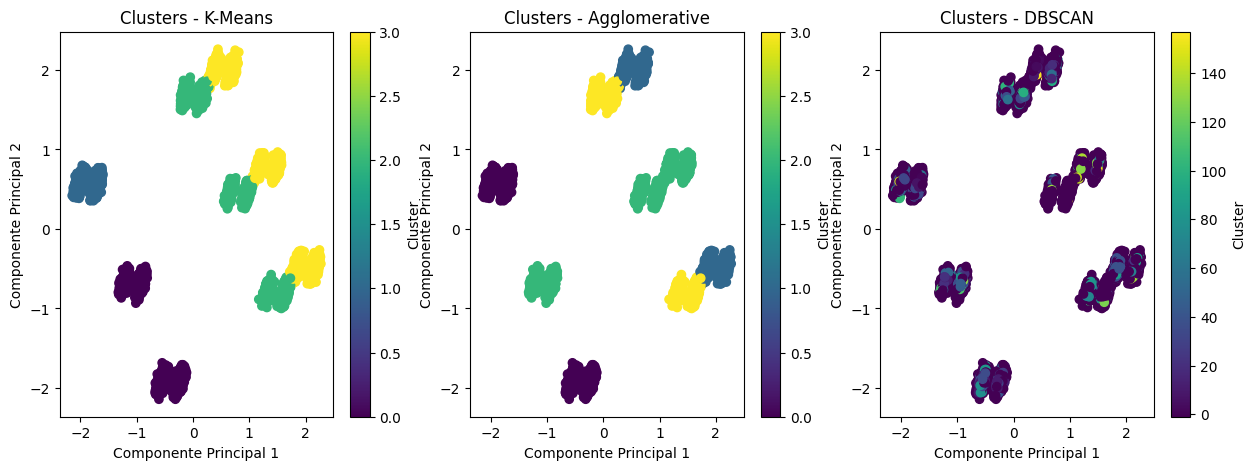

Puntuaciones de Silueta:
K-Means: 0.13882539928715082
Agglomerative: 0.16577987362992744
DBSCAN: -0.23859359192898083


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Suponiendo que tienes un DataFrame 'df' con las nuevas columnas

df = df3

# Selecciona las columnas numéricas que se utilizarán para el clustering
columns_for_clustering = ['IMC', 'DuracionDiabetes', 'HorasSueno', 'NivelEstres', 'ActividadFisica', 'TipoAlimentacion', 'ConsumoCafeina', 'UsoTecnologia']

# Filtra el DataFrame con las columnas seleccionadas
data_for_clustering = df[columns_for_clustering]

# Codifica las variables categóricas usando one-hot encoding
data_for_clustering_encoded = pd.get_dummies(data_for_clustering, columns=['TipoAlimentacion', 'NivelEstres', 'ActividadFisica'])

# Normaliza los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering_encoded)

# Aplica PCA para reducir la dimensionalidad (opcional pero puede ayudar)
pca = PCA(n_components=2)
data_for_clustering_pca = pca.fit_transform(data_for_clustering_scaled)

# Métodos de clustering
cluster_methods = [
    ('K-Means', KMeans(n_clusters=4, random_state=0)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=4)),
    ('DBSCAN', DBSCAN(eps=1.0, min_samples=5))  # Ajusta los parámetros de DBSCAN
]

# Genera clústeres para cada método y calcula la puntuación de silueta
silhouette_scores = {}
cluster_labels = {}

for method_name, method in cluster_methods:
    labels = method.fit_predict(data_for_clustering_scaled)
    silhouette_avg = silhouette_score(data_for_clustering_scaled, labels)
    silhouette_scores[method_name] = silhouette_avg
    cluster_labels[method_name] = labels

# Visualización de clústeres en el espacio PCA (2D) para cada método
plt.figure(figsize=(15, 5))
for i, (method_name, labels) in enumerate(cluster_labels.items(), start=1):
    plt.subplot(1, 3, i)
    plt.scatter(data_for_clustering_pca[:, 0], data_for_clustering_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title(f'Clusters - {method_name}')
    plt.colorbar(label='Cluster')

plt.show()

# Imprime las puntuaciones de silueta para comparar los métodos
print("Puntuaciones de Silueta:")
for method_name, score in silhouette_scores.items():
    print(f"{method_name}: {score}")


C:\Users\Msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


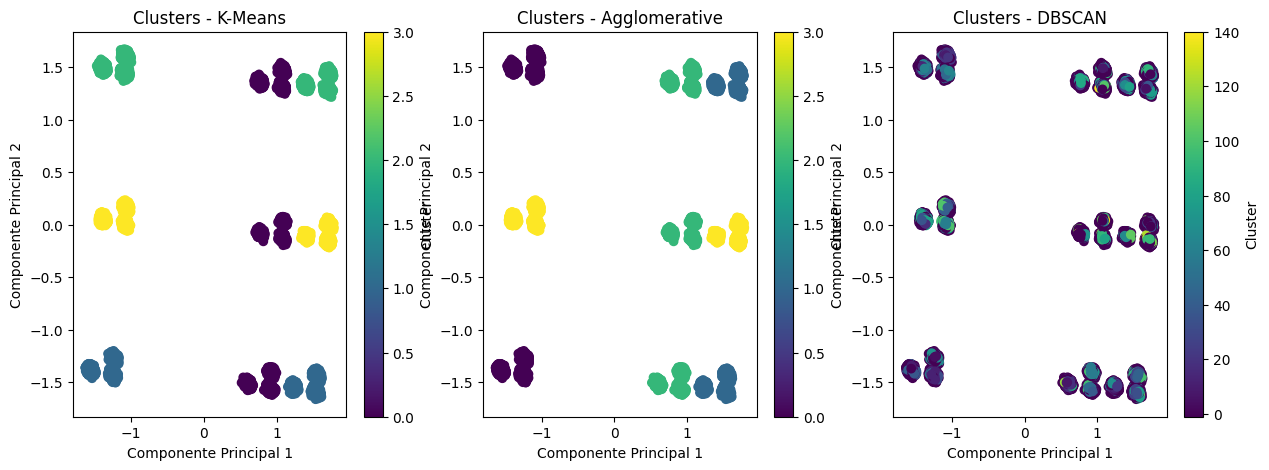

Puntuaciones de Silueta:
K-Means: 0.1635711292326054
Agglomerative: 0.16672646363832194
DBSCAN: -0.03688141614489022


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Suponiendo que tienes un DataFrame 'df' con las nuevas columnas

df = df4

# Selecciona las columnas numéricas que se utilizarán para el clustering
columns_for_clustering = ['IMC', 'DuracionDiabetes', 'HorasSueno', 'NivelEstres', 'ActividadFisica', 'TipoAlimentacion', 'ConsumoCafeina', 'UsoTecnologia']

# Filtra el DataFrame con las columnas seleccionadas
data_for_clustering = df[columns_for_clustering]

# Codifica las variables categóricas usando one-hot encoding
data_for_clustering_encoded = pd.get_dummies(data_for_clustering, columns=['TipoAlimentacion', 'NivelEstres', 'ActividadFisica'])

# Normaliza los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering_encoded)

# Aplica PCA para reducir la dimensionalidad (opcional pero puede ayudar)
pca = PCA(n_components=2)
data_for_clustering_pca = pca.fit_transform(data_for_clustering_scaled)

# Métodos de clustering
cluster_methods = [
    ('K-Means', KMeans(n_clusters=4, random_state=0)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=4)),
    ('DBSCAN', DBSCAN(eps=1.0, min_samples=5))  # Ajusta los parámetros de DBSCAN
]

# Genera clústeres para cada método y calcula la puntuación de silueta
silhouette_scores = {}
cluster_labels = {}

for method_name, method in cluster_methods:
    labels = method.fit_predict(data_for_clustering_scaled)
    silhouette_avg = silhouette_score(data_for_clustering_scaled, labels)
    silhouette_scores[method_name] = silhouette_avg
    cluster_labels[method_name] = labels

# Visualización de clústeres en el espacio PCA (2D) para cada método
plt.figure(figsize=(15, 5))
for i, (method_name, labels) in enumerate(cluster_labels.items(), start=1):
    plt.subplot(1, 3, i)
    plt.scatter(data_for_clustering_pca[:, 0], data_for_clustering_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title(f'Clusters - {method_name}')
    plt.colorbar(label='Cluster')

plt.show()

# Imprime las puntuaciones de silueta para comparar los métodos
print("Puntuaciones de Silueta:")
for method_name, score in silhouette_scores.items():
    print(f"{method_name}: {score}")


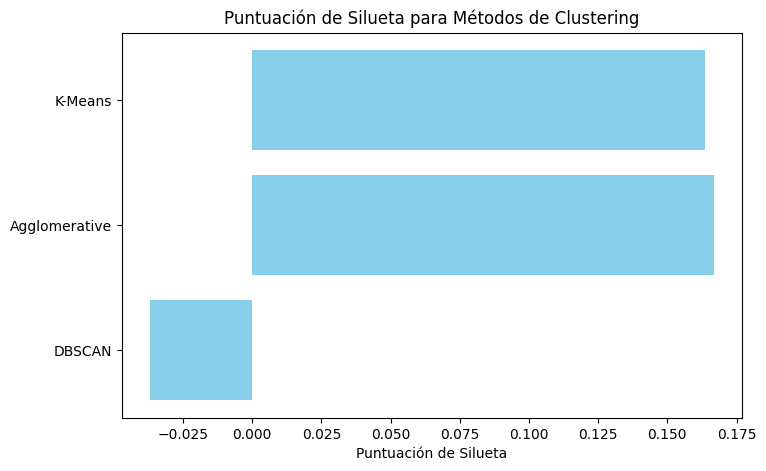

In [9]:
# Extrae los nombres de los métodos y las puntuaciones
methods = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())

# Crea un gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(methods, scores, color='skyblue')
plt.xlabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta para Métodos de Clustering')
plt.gca().invert_yaxis()  # Invierte el eje y para que el método con la puntuación más alta esté arriba
plt.show()

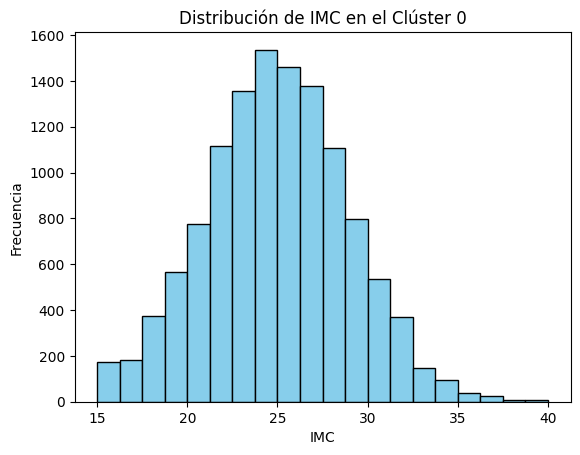

In [10]:
# Suponiendo que 'Agglomerative' tiene la mayor puntuación de silueta
best_clustering_method = 'Agglomerative'

# Obtenemos las etiquetas de clústeres para el mejor método
best_labels = cluster_labels[best_clustering_method]

# Agregamos las etiquetas de clústeres al DataFrame original
df['Cluster'] = best_labels

# Filtramos los datos para un clúster específico, por ejemplo, el clúster 0
cluster_0_data = df[df['Cluster'] == 0]

# Ahora podemos analizar las tendencias en la columna 'IMC' dentro del clúster 0
plt.hist(cluster_0_data['IMC'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.title('Distribución de IMC en el Clúster 0')
plt.show()


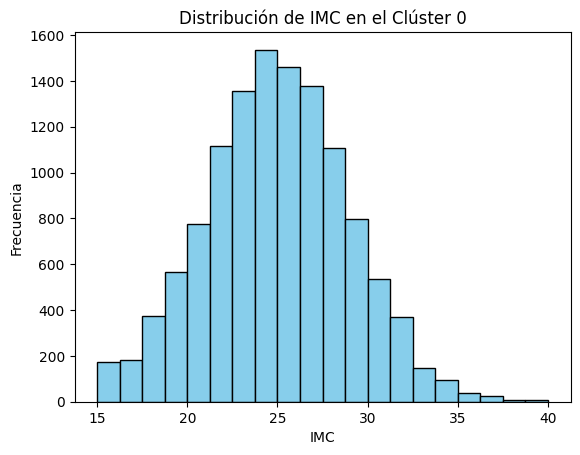

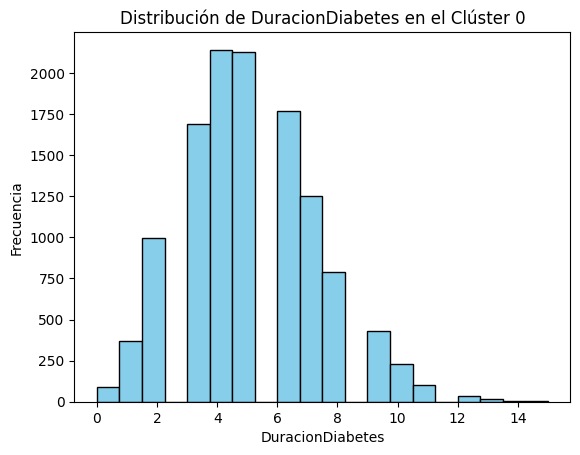

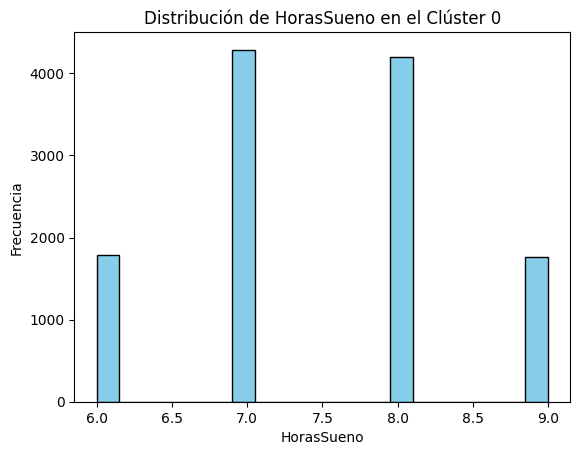

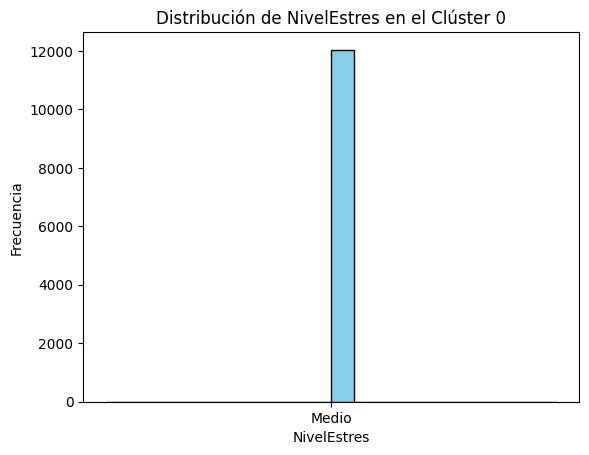

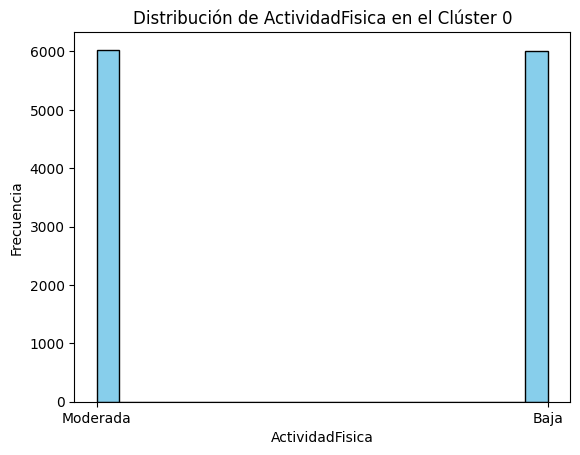

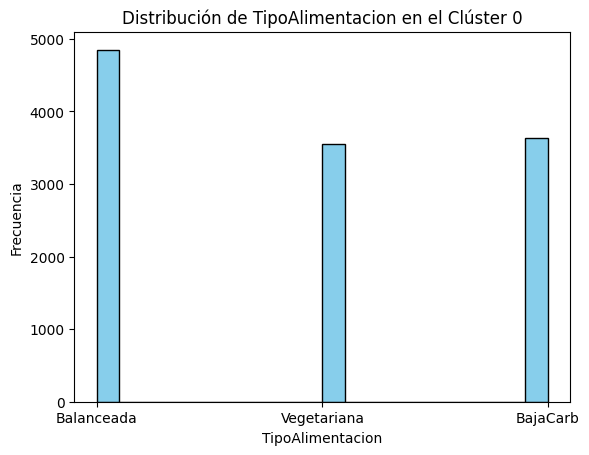

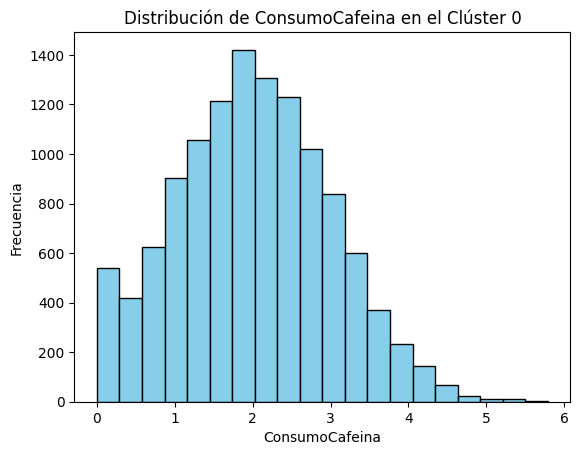

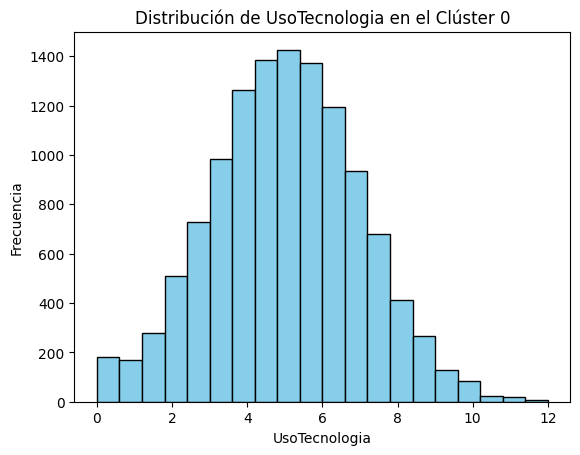

In [11]:
# Suponiendo que 'Agglomerative' tiene la mayor puntuación de silueta
best_clustering_method = 'Agglomerative'

# Obtenemos las etiquetas de clústeres para el mejor método
best_labels = cluster_labels[best_clustering_method]

# Agregamos las etiquetas de clústeres al DataFrame original
df['Cluster'] = best_labels

# Lista de columnas numéricas para realizar el análisis
numeric_columns = ['IMC', 'DuracionDiabetes', 'HorasSueno', 'NivelEstres', 'ActividadFisica', 'TipoAlimentacion', 'ConsumoCafeina', 'UsoTecnologia']

# Itera a través de las columnas numéricas y realiza el análisis
for column in numeric_columns:
    plt.hist(df[df['Cluster'] == 0][column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {column} en el Clúster 0')
    plt.show()


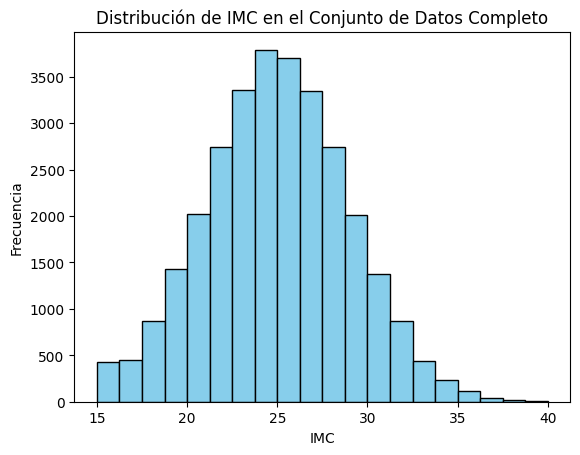

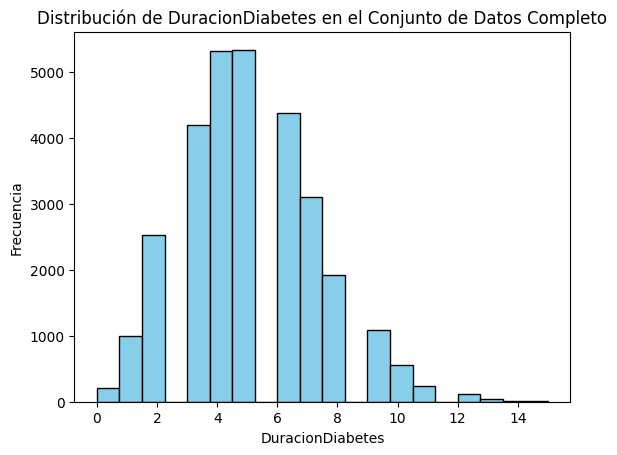

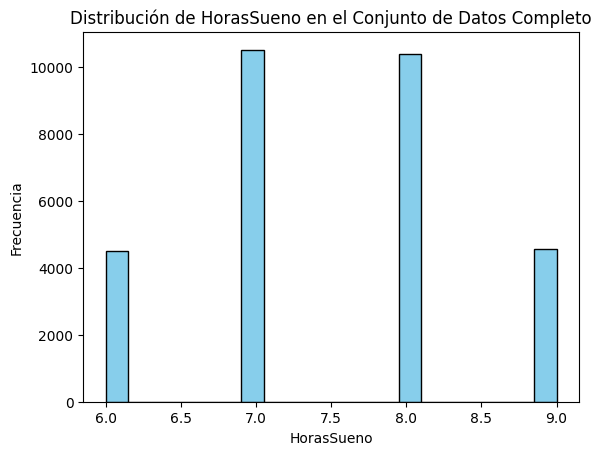

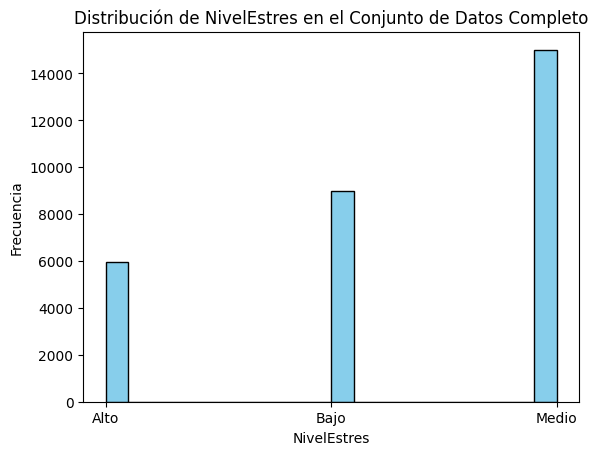

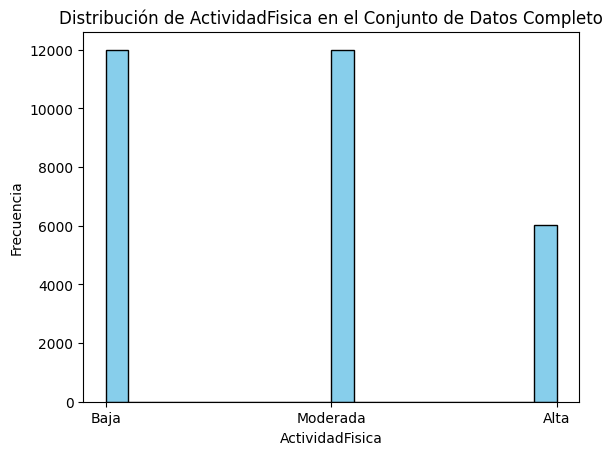

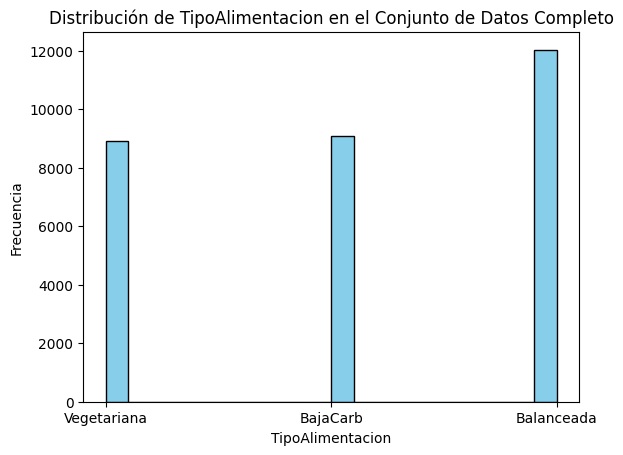

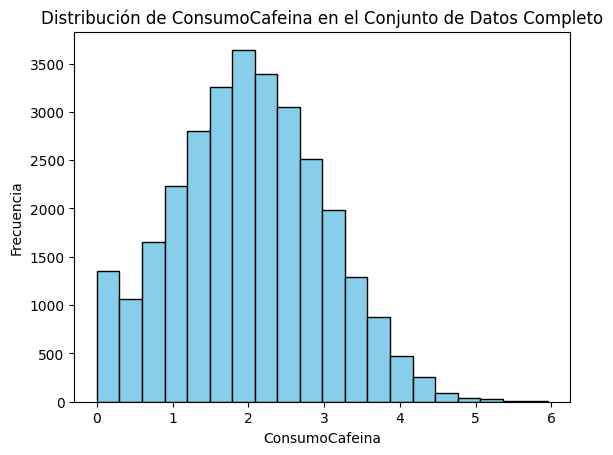

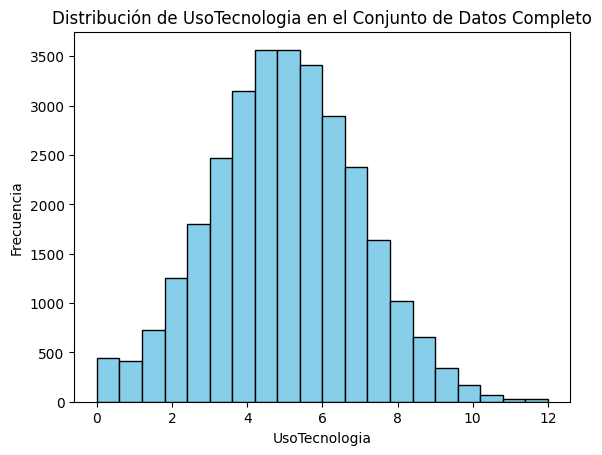

In [12]:
# Lista de columnas numéricas para realizar el análisis
numeric_columns = ['IMC', 'DuracionDiabetes', 'HorasSueno', 'NivelEstres', 'ActividadFisica', 'TipoAlimentacion', 'ConsumoCafeina', 'UsoTecnologia']

# Itera a través de las columnas numéricas y realiza el análisis
for column in numeric_columns:
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {column} en el Conjunto de Datos Completo')
    plt.show()
